<a href="https://colab.research.google.com/github/mylonasc/compeng/blob/master/15_11_2021_colab_foam_foil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preliminaries:
* Installing OpenFOAM
* Running the example for the 2D airfoil by copying the corresponding tutorial file

In [1]:
#@title Install OpenFOAM and python parser for results

INSTALL_FOAM = True #@param {type: 'boolean'}
INSTALL_OFPP = True #@param {type : 'boolean'}
if INSTALL_FOAM:
    !echo "#!/bin/bash" > foam_install.sh
    !echo 'sudo sh -c "wget -O - https://dl.openfoam.org/gpg.key | apt-key add -"' >> foam_install.sh
    !echo 'sudo add-apt-repository http://dl.openfoam.org/ubuntu' >> foam_install.sh
    !echo "sudo apt-get update" >> foam_install.sh
    !echo "sudo apt-get -y install openfoam7" >> foam_install.sh
    !chmod +x foam_install.sh
    !./foam_install.sh
    !echo "Running the initialization for the env. variables:(normally one would add the following line to the ~/.bashrc file)"
    !source /opt/openfoam7/etc/bashrc
if INSTALL_OFPP:
    !pip install ofpp

--2021-11-18 15:17:38--  https://dl.openfoam.org/gpg.key
Resolving dl.openfoam.org (dl.openfoam.org)... 35.179.33.128
Connecting to dl.openfoam.org (dl.openfoam.org)|35.179.33.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1710 (1.7K) [application/pgp-keys]
Saving to: ‘STDOUT’

-                   100%[===================>]   1.67K  --.-KB/s    in 0s      

2021-11-18 15:17:39 (413 MB/s) - written to stdout [1710/1710]

OK
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://dl.openfoam.org/ubuntu bionic InRelease [6,354 B]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu18

In [2]:
#@title Setting environment variables necessary for OpenFOAM
%env FOAM_APP=/opt/openfoam7/applications
%env FOAM_APPBIN=/opt/openfoam7/platforms/linux64GccDPInt32Opt/bin
%env FOAM_ETC=/opt/openfoam7/etc
%env FOAM_EXT_LIBBIN=/opt/ThirdParty-7/platforms/linux64GccDPInt32/lib
%env FOAM_INST_DIR=/opt
%env FOAM_JOB_DIR=/opt/jobControl
%env FOAM_LIBBIN=/opt/openfoam7/platforms/linux64GccDPInt32Opt/lib
%env FOAM_MPI=openmpi-system
%env FOAM_RUN=/root/OpenFOAM/-7/run
%env FOAM_SITE_APPBIN=/opt/site/7/platforms/linux64GccDPInt32Opt/bin
%env FOAM_SITE_LIBBIN=/opt/site/7/platforms/linux64GccDPInt32Opt/lib
%env FOAM_SOLVERS=/opt/openfoam7/applications/solvers
%env FOAM_SRC=/opt/openfoam7/src
%env FOAM_TUTORIALS=/opt/openfoam7/tutorials
%env FOAM_USER_APPBIN=/root/OpenFOAM/-7/platforms/linux64GccDPInt32Opt/bin
%env FOAM_USER_LIBBIN=/root/OpenFOAM/-7/platforms/linux64GccDPInt32Opt/lib
%env FOAM_UTILITIES=/opt/openfoam7/applications/utilities
%env GCE_METADATA_TIMEOUT=0
%env GCS_READ_CACHE_BLOCK_SIZE_MB=16
%env GLIBCPP_FORCE_NEW=1
%env GLIBCXX_FORCE_NEW=1
%env HOME=/root
%env HOSTNAME=c4457194412a
%env LANG=en_US.UTF-8
%env LAST_FORCED_REBUILD=20211029
%env LD_LIBRARY_PATH=/opt/ThirdParty-7/platforms/linux64Gcc/gperftools-svn/lib:/opt/paraviewopenfoam56/lib/paraview-5.6:/opt/openfoam7/platforms/linux64GccDPInt32Opt/lib/openmpi-system:/opt/ThirdParty-7/platforms/linux64GccDPInt32/lib/openmpi-system:/usr/lib/x86_64-linux-gnu/openmpi/lib:/root/OpenFOAM/-7/platforms/linux64GccDPInt32Opt/lib:/opt/site/7/platforms/linux64GccDPInt32Opt/lib:/opt/openfoam7/platforms/linux64GccDPInt32Opt/lib:/opt/ThirdParty-7/platforms/linux64GccDPInt32/lib:/opt/openfoam7/platforms/linux64GccDPInt32Opt/lib/dummy:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
%env LESSCLOSE='/usr/bin/lesspipe %s %s'
%env LESSOPEN="| /usr/bin/lesspipe %s"
%env LIBRARY_PATH=/usr/local/cuda/lib64/stubs
%env LS_COLORS=rs=0:di=01;34:ln=01;36:mh=00:pi=40;33:so=01;35:do=01;35:bd=40;33;01:cd=40;33;01:or=40;31;01:mi=00:su=37;41:sg=30;43:ca=30;41:tw=30;42:ow=34;42:st=37;44:ex=01;32:*.tar=01;31:*.tgz=01;31:*.arc=01;31:*.arj=01;31:*.taz=01;31:*.lha=01;31:*.lz4=01;31:*.lzh=01;31:*.lzma=01;31:*.tlz=01;31:*.txz=01;31:*.tzo=01;31:*.t7z=01;31:*.zip=01;31:*.z=01;31:*.Z=01;31:*.dz=01;31:*.gz=01;31:*.lrz=01;31:*.lz=01;31:*.lzo=01;31:*.xz=01;31:*.zst=01;31:*.tzst=01;31:*.bz2=01;31:*.bz=01;31:*.tbz=01;31:*.tbz2=01;31:*.tz=01;31:*.deb=01;31:*.rpm=01;31:*.jar=01;31:*.war=01;31:*.ear=01;31:*.sar=01;31:*.rar=01;31:*.alz=01;31:*.ace=01;31:*.zoo=01;31:*.cpio=01;31:*.7z=01;31:*.rz=01;31:*.cab=01;31:*.wim=01;31:*.swm=01;31:*.dwm=01;31:*.esd=01;31:*.jpg=01;35:*.jpeg=01;35:*.mjpg=01;35:*.mjpeg=01;35:*.gif=01;35:*.bmp=01;35:*.pbm=01;35:*.pgm=01;35:*.ppm=01;35:*.tga=01;35:*.xbm=01;35:*.xpm=01;35:*.tif=01;35:*.tiff=01;35:*.png=01;35:*.svg=01;35:*.svgz=01;35:*.mng=01;35:*.pcx=01;35:*.mov=01;35:*.mpg=01;35:*.mpeg=01;35:*.m2v=01;35:*.mkv=01;35:*.webm=01;35:*.ogm=01;35:*.mp4=01;35:*.m4v=01;35:*.mp4v=01;35:*.vob=01;35:*.qt=01;35:*.nuv=01;35:*.wmv=01;35:*.asf=01;35:*.rm=01;35:*.rmvb=01;35:*.flc=01;35:*.avi=01;35:*.fli=01;35:*.flv=01;35:*.gl=01;35:*.dl=01;35:*.xcf=01;35:*.xwd=01;35:*.yuv=01;35:*.cgm=01;35:*.emf=01;35:*.ogv=01;35:*.ogx=01;35:*.aac=00;36:*.au=00;36:*.flac=00;36:*.m4a=00;36:*.mid=00;36:*.midi=00;36:*.mka=00;36:*.mp3=00;36:*.mpc=00;36:*.ogg=00;36:*.ra=00;36:*.wav=00;36:*.oga=00;36:*.opus=00;36:*.spx=00;36:*.xspf=00;36:
%env MPI_ARCH_PATH=/usr/lib/x86_64-linux-gnu/openmpi
%env MPI_BUFFER_SIZE=20000000
%env NCCL_VERSION=2.7.8
%env NO_GCE_CHECK=True
%env NVIDIA_DRIVER_CAPABILITIES=compute,utility
%env NVIDIA_REQUIRE_CUDA=cuda>=11.1 brand=tesla,driver>=418,driver<419 brand=tesla,driver>=440,driver<441 brand=tesla,driver>=450,driver<451
%env NVIDIA_VISIBLE_DEVICES=all
%env OLDPWD=/content
%env PATH=/opt/ThirdParty-7/platforms/linux64Gcc/gperftools-svn/bin:/opt/paraviewopenfoam56/bin:/root/OpenFOAM/-7/platforms/linux64GccDPInt32Opt/bin:/opt/site/7/platforms/linux64GccDPInt32Opt/bin:/opt/openfoam7/platforms/linux64GccDPInt32Opt/bin:/opt/openfoam7/bin:/opt/openfoam7/wmake:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/opt/bin
%env PV_PLUGIN_PATH=/opt/openfoam7/platforms/linux64GccDPInt32Opt/lib/paraview-5.6
%env PWD=/content/airFoil2D
%env PYTHONPATH=/env/python
%env PYTHONWARNINGS=ignore:::pip._internal.cli.base_command
%env ParaView_DIR=/opt/paraviewopenfoam56
%env ParaView_GL=mesa
%env ParaView_INCLUDE_DIR=/opt/paraviewopenfoam56/include/paraview-5.6
%env ParaView_MAJOR=5.6
%env ParaView_VERSION=5.6.0
%env SHELL=/bin/bash
%env SHLVL=1
%env TBE_CREDS_ADDR=172.28.0.1:8008
%env TBE_EPHEM_CREDS_ADDR=172.28.0.1:8009
%env TERM=screen
%env TF_FORCE_GPU_ALLOW_GROWTH=true
%env TMUX=/tmp/tmux-0/default,8370,0
%env TMUX_PANE=%0
%env WM_ARCH=linux64
%env WM_ARCH_OPTION=64
%env WM_CC=gcc
%env WM_CFLAGS=-m64 -fPIC
%env WM_COMPILER=Gcc
%env WM_COMPILER_LIB_ARCH=64
%env WM_COMPILER_TYPE=system
%env WM_COMPILE_OPTION=Opt
%env WM_CXX=g++
%env WM_CXXFLAGS=-m64 -fPIC -std=c++0x
%env WM_DIR=/opt/openfoam7/wmake
%env WM_LABEL_OPTION=Int32
%env WM_LABEL_SIZE=32
%env WM_LDFLAGS=-m64
%env WM_LINK_LANGUAGE=c++
%env WM_MPLIB=SYSTEMOPENMPI
%env WM_OPTIONS=linux64GccDPInt32Opt
%env WM_OSTYPE=POSIX
%env WM_PRECISION_OPTION=DP
%env WM_PROJECT=OpenFOAM
%env WM_PROJECT_DIR=/opt/openfoam7
%env WM_PROJECT_INST_DIR=/opt
%env WM_PROJECT_USER_DIR=/root/OpenFOAM/-7
%env WM_PROJECT_VERSION=7
%env WM_THIRD_PARTY_DIR=/opt/ThirdParty-7

env: FOAM_APP=/opt/openfoam7/applications
env: FOAM_APPBIN=/opt/openfoam7/platforms/linux64GccDPInt32Opt/bin
env: FOAM_ETC=/opt/openfoam7/etc
env: FOAM_EXT_LIBBIN=/opt/ThirdParty-7/platforms/linux64GccDPInt32/lib
env: FOAM_INST_DIR=/opt
env: FOAM_JOB_DIR=/opt/jobControl
env: FOAM_LIBBIN=/opt/openfoam7/platforms/linux64GccDPInt32Opt/lib
env: FOAM_MPI=openmpi-system
env: FOAM_RUN=/root/OpenFOAM/-7/run
env: FOAM_SITE_APPBIN=/opt/site/7/platforms/linux64GccDPInt32Opt/bin
env: FOAM_SITE_LIBBIN=/opt/site/7/platforms/linux64GccDPInt32Opt/lib
env: FOAM_SOLVERS=/opt/openfoam7/applications/solvers
env: FOAM_SRC=/opt/openfoam7/src
env: FOAM_TUTORIALS=/opt/openfoam7/tutorials
env: FOAM_USER_APPBIN=/root/OpenFOAM/-7/platforms/linux64GccDPInt32Opt/bin
env: FOAM_USER_LIBBIN=/root/OpenFOAM/-7/platforms/linux64GccDPInt32Opt/lib
env: FOAM_UTILITIES=/opt/openfoam7/applications/utilities
env: GCE_METADATA_TIMEOUT=0
env: GCS_READ_CACHE_BLOCK_SIZE_MB=16
env: GLIBCPP_FORCE_NEW=1
env: GLIBCXX_FORCE_NEW=1
env:

In [5]:
#@title Copy the simulation setup for running a steady-state airfoil from the tutorials folder
!cp -r /opt/openfoam7/tutorials/incompressible/simpleFoam/airFoil2D/ .
!chmod +x airFoil2D/Allrun
!chmod +x airFoil2D/Allclean


In [6]:
!cd airFoil2D && ./Allclean
!cd airFoil2D && ./Allrun

Running simpleFoam on /content/airFoil2D


In [7]:
import Ofpp
import os
import numpy as np
fields = os.listdir('airFoil2D/300')
fields_data = {}
for f in fields:
    try:
        fields_data.update({f : Ofpp.parse_internal_field('airFoil2D/300/'+f)})
    except:
        None

In [10]:
import matplotlib.pyplot as pplot


In [19]:
mesh = Ofpp.FoamMesh('airFoil2D')
walls = mesh.boundary_cells(b'walls')

In [20]:
cf = np.array(mesh.cell_faces)
p1 = mesh.points[cf[:,0]]
p2 = mesh.points[cf[:,1]]
fp = ((p1+p2)/2)

In [21]:
fa = np.array(mesh.faces)
p1, p2, p3, p4 = [mesh.points[fa[:,k]] for k in range(4)]


In [22]:
mp = (p1 + p2 + p3+ p4)/4

In [23]:
cell_centers = (mp[cf[:,2]] + mp[cf[:,3]] + mp[cf[:,4]] + mp[cf[:,5]])/4

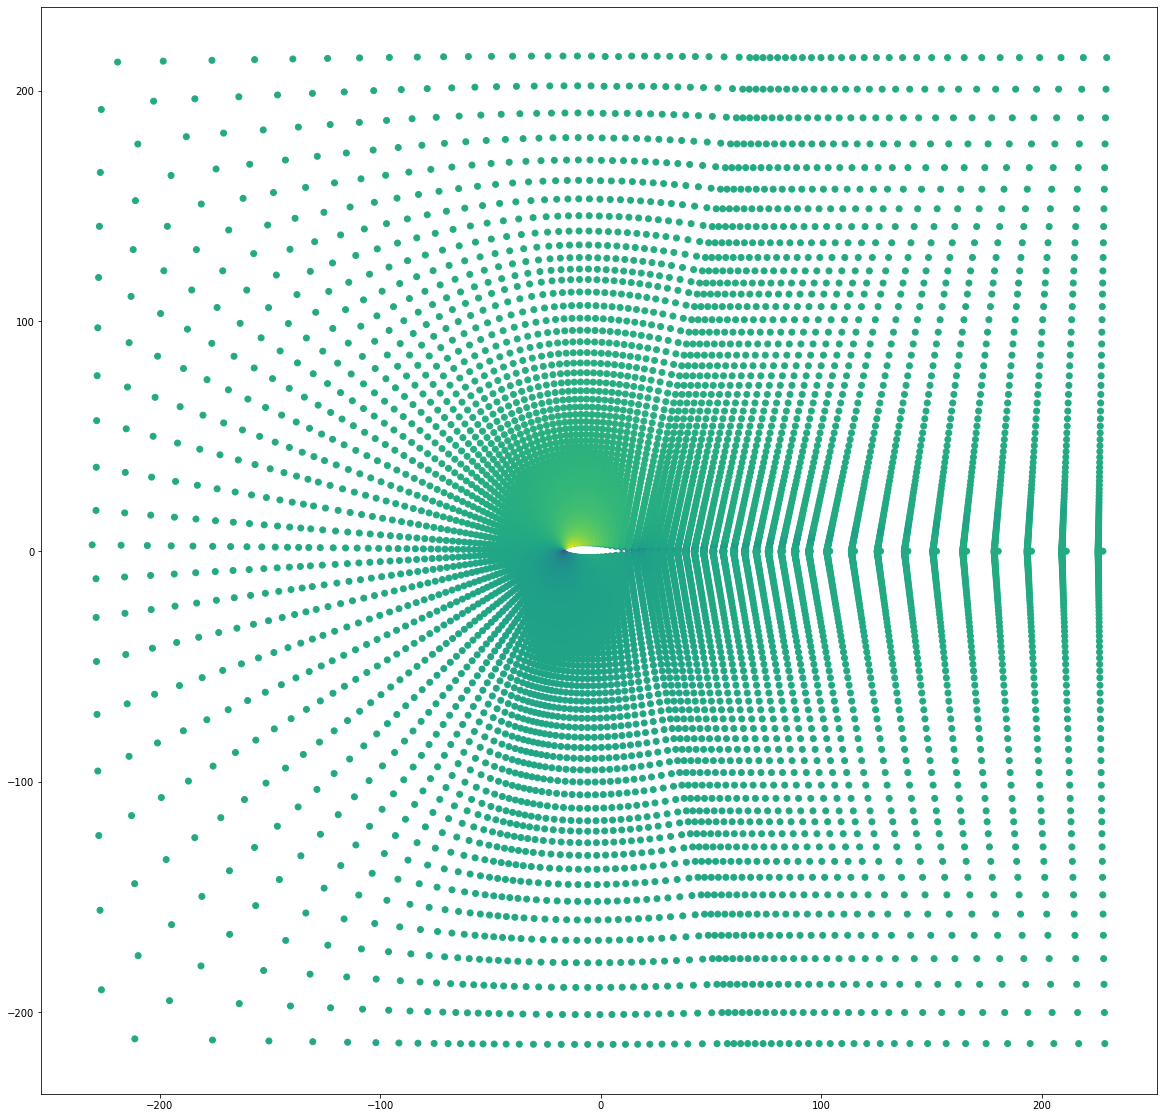

In [24]:
pplot.figure(figsize = (20,20))
pplot.scatter(cell_centers[:,0], cell_centers[:,1],c = fields_data['U'][:,0])